## **Εξαγωγή χαρακτηριστηκών ήχου**

**Πλήθος μηδενικών διασταυρώσεων (Zero-crossing rate)**



In [25]:
#Εισαγωγή βιβλιοθηκών

import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

In [26]:
#Αρχικοποίηση μήκους πλαισίου,μήκους βήματος 
FRAME_SIZE=512 
HOP_LENGTH=256

#Όταν το βήμα είναι μισό του μήκους πλαισίου έχουμε 50% επικάλυψη πλαισίων

> H βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html) μας δίνει την δυνατότητα να φορτώσουμε ένα αρχείο ήχου με την εντολή [librosa.load](https://librosa.org/doc/main/generated/librosa.load.html) συναρτήσει του χρόνου.

Για την ανάγνωση αρχείων στο Google Collab προτείνεται η διαδικασία που φαίνεται εδώ: https://neptune.ai/blog/google-colab-dealing-with-files

In [27]:
#Αρχικοποίηση αρχείων/δειγμάτων
file_path=("/content/Piano C#.wav")
audio_sample, sr =librosa.load(file_path)

Για την εξυπηρέτηση των αναγκών της εγασίας αυτής, προτιμήθηκε η χρήση αρχείων μικρής διάρκειας και μίας νότας. 

*Αν θέλαμε να φορτώσουμε κάποιο δοκιμαστικό αρχείο ήχου από την βιλβιοθήκη librosa :*


```
filename= librosa.ex('trumpet')
audio_sample, sr =librosa.load(filename)

```











> Στην συνέχεια μπορούμε να αναπαράγουμε το σήμα μέσω της βιβλιοθήκης [IPython](https://ipython.org/).



In [28]:
#Αναπαραγωγή ήχου
ipd.Audio(data=audio_sample,rate=sr)

> **Υπολογισμός Πλήθος μηδενικών διασταυρώσεων (ZCR) με την βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html).**




> Για πηγαίο κώδικα [librosa.feature.zcr](https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html)

In [37]:
zcr_audio_sample=librosa.feature.zero_crossing_rate(audio_sample,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]

Text(0.5, 1.0, 'Trumpet sample zero crossing rate with the librosa function')

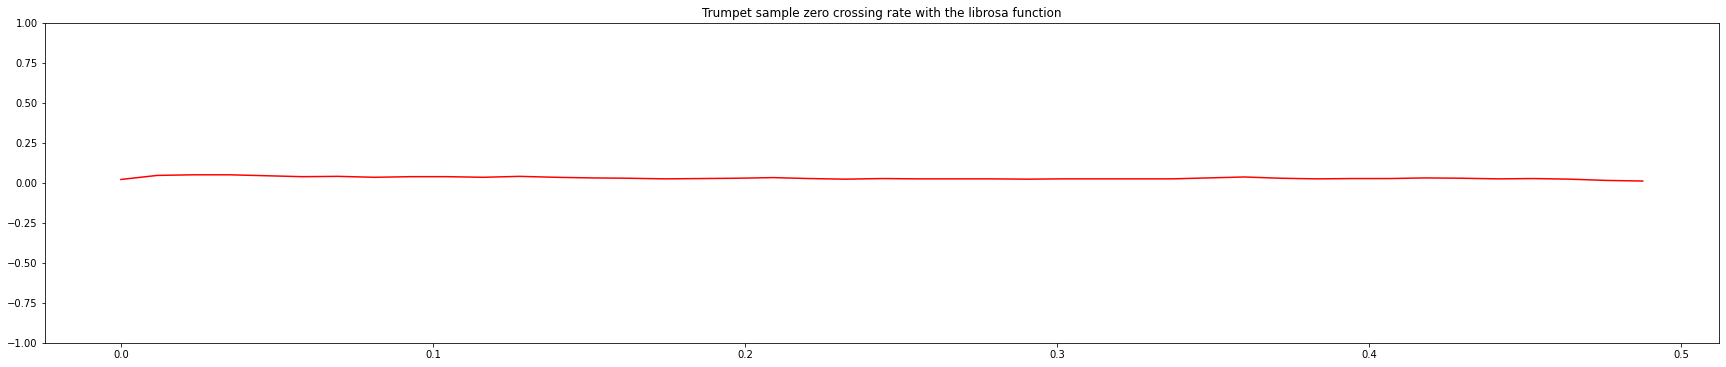

In [35]:
#Μετατροπή πλαισίων σε χρόνο
frames = range(len(zcr_audio_sample))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

#Ορισμός μεγέθους διαγράμματος
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)

#Γραφική αναπαράσταση του πλήθους μηδενικών διασταυρώσεων συναρτήσει του χρόνου
plt.plot(t, zcr_audio_sample, color="r")
plt.ylim((-1, 1))
plt.title("Piano sample zero crossing rate with the librosa function")

> **Υπολογισμός πλήθους μηδενικών διασταυρώσεων με δική μας συνάρτηση**


> Για να υπολογίσουμε το πλήθος μηδενικών διασταυρώσεων ολόκληρου του σήματος, το χωρίζουμε σε πλαίσια και υπολογίζουμε το πλήθος για κάθε πλαίσιο ως:$$ Σ|sgn[x(m)]-sng[x(m-1)]w[n-m]|$$ 
όπου w κατάλληλη συνάρτηση παραθύρωσης(εξαρτάται από την εφαρμογή).





In [31]:
#Ορισμός συνάρτησης πλήθους μηδενικών διασταυρώσεων 
def calcZcr(y,frame_size=512,hop_length=512):
    #Συνάρτηση υπολογισμού προσήμου
    sign = lambda a:(a>=0)-(a<0)
    #Δημιπυργία κενής λίστας
    zcr =[]
    #Υπολογισμός πλήθους μηδ.διασταυρώσεων για κάθε πλαίσιο
    for i in range (0,len(y),hop_length):
        zcr_cf=0
        for k in range (i,i+frame_size,1):
            if k<len(y)-1:
                if sign(float(y[k]))!=sign(float(y[k+1])):
                    zcr_cf+=1
        zcr.append((zcr_cf))
    #Επιστρέφει το πλήθος των μηδ.διασταυρώσεων για κάθε πλαίσιο
    return np.array(zcr)

In [32]:
#Υπολογισμός ZCR ενέργειας με δική μας συνάρτηση
my_zcr_audio_sample = calcZcr(audio_sample, FRAME_SIZE, HOP_LENGTH)

Text(0.5, 1.0, 'Trumpet sample zero crossing rate with our function')

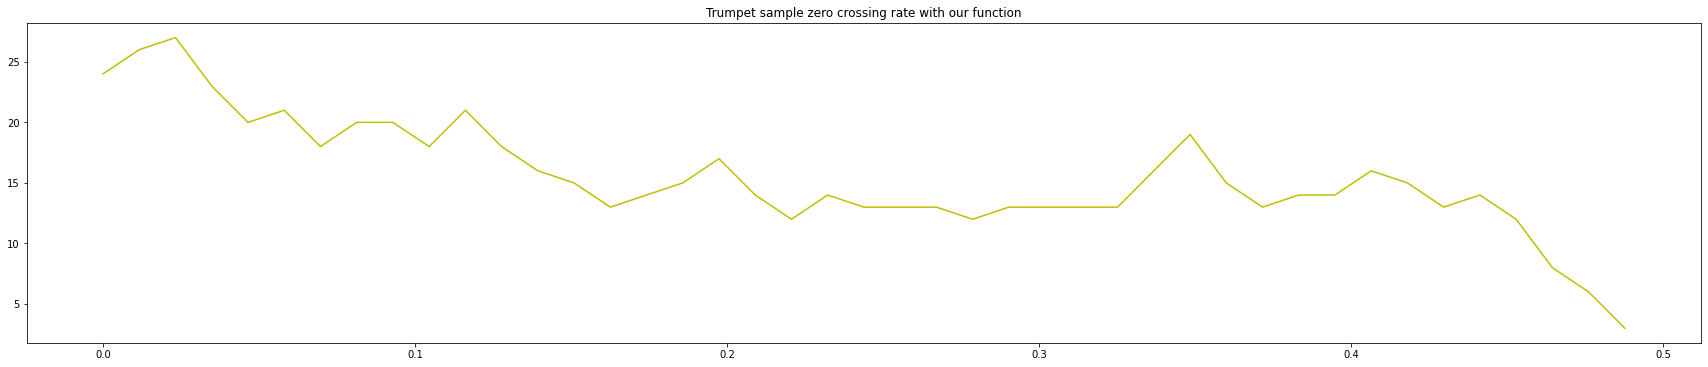

In [33]:
#Μετατροπή πλαισίων σε χρόνο
frames = range(len(my_zcr_audio_sample))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

#Ορισμός μεγέθους διαγράμματος
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)

#Γραφική αναπαράσταση του πλήθους μηδενικών διασταυρώσεων συναρτήσει του χρόνου
plt.plot(t, my_zcr_audio_sample, color="y")
plt.title("Piano sample zero crossing rate with our function")

 **Σημείωση**:Οι διαφορά που παρατηρείται στα δύο διαγράμμα προκύπτει και εξαρτάται άμεσα από την συνάρτηση παραθύρωσης που έχει εφαρμοστεί στο προς επεξεργασία σήμα.